In [1]:
# Libraries
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [78]:
# read masks for class 1, 2, 3
c1_mask = cv2.imread('Images/C1.jpg', 0)
c2_mask = cv2.imread('Images/C2.jpg', 0)
c3_mask = cv2.imread('Images/C3.jpg', 0)

# read images
img1 = cv2.imread('Images/img1.jpg' , 0)
img2 = cv2.imread('Images/img2.jpg' , 0)
img3 = cv2.imread('Images/img3.jpg' , 0)
img4 = cv2.imread('Images/img4.jpg' , 0)

# main image
main = cv2.imread('Images/Main.jpg', cv2.COLOR_BGR2RGB)

In [79]:
# threshold images
_ , c1_mask = cv2.threshold(c1_mask, 100, 255, cv2.THRESH_BINARY)
_ , c2_mask = cv2.threshold(c2_mask, 100, 255, cv2.THRESH_BINARY)
_ , c3_mask = cv2.threshold(c3_mask, 100, 255, cv2.THRESH_BINARY)

In [80]:
# whole image (for test the model)
global whole_image
whole_image = (np.dstack((img1, img2, img3, img4))).astype(np.uint8)

# Normalize data
whole_image = (whole_image - whole_image.min()) / (whole_image.max() - whole_image.min())

# flatting images 
whole_image = whole_image.reshape(512 * 512 , 4)

## Create Training dataset

In [81]:
# create dataset 
dataset = []

# rows for class 1
for i in range(c1_mask.shape[0]):
    for j in range(c1_mask.shape[1]):
        if (c1_mask[i][j] > 0):
            dataset.append([img1[i][j], img2[i][j], img3[i][j], img4[i][j], 1])

# rows for class 2
for i in range(c2_mask.shape[0]):
    for j in range(c2_mask.shape[1]):
        if (c2_mask[i][j] > 0):
            dataset.append([img1[i][j], img2[i][j], img3[i][j], img4[i][j], 2])

# rows for class 3
for i in range(c3_mask.shape[0]):
    for j in range(c3_mask.shape[1]):
        if (c3_mask[i][j] > 0):
            dataset.append([img1[i][j], img2[i][j], img3[i][j], img4[i][j], 3])

# cast data set to nd.array
dataset = np.array(dataset)

# save dataset to file
np.savetxt("Dataset.csv", dataset, delimiter=",")

## Read and preprocess the Data

In [82]:
# read dataset
dataset = pd.read_csv('Dataset.csv', header= None)

# shuffle dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [83]:
# Split X and Y
X = dataset.iloc[:,0:-1]
Y = np.int8(dataset.iloc[:, -1])

In [84]:
# Normalize Data
X = (X - X.min()) / (X.max() - X.min())

## Main Function

In [85]:
def train_test_model(x, y, hidden_layers, epochs, alpha):
    # create model
    model = []
    model = MLPClassifier(alpha= alpha, hidden_layer_sizes = hidden_layers, max_iter= epochs,  n_iter_no_change = epochs, solver='sgd')
    
    # fit data to model
    model.fit(x, y)
    
    # print results
    accuracy = model.score(X, Y)
    loss = model.loss_
    print(f"model [4, {hidden_layers}, 3]\nAccuracy = {accuracy}\nLoss = {loss}")
    
    # plot loss
    plt.plot(model.loss_curve_)
    plt.title('Loss')
    plt.ylabel('MSE')
    plt.xlabel('Epoch')
    
    # make predictions
    prediction_image = model.predict(whole_image)
    prediction_image = prediction_image.reshape(512,512)
    
    # plot results
    fig , axs = plt.subplots(nrows= 1, ncols= 2,figsize = (15,10))
    axs[0].imshow(main)
    axs[1].imshow(prediction_image)

## Model 1 (4, 2, 3)

model [4, (2,), 3]
Accuracy = 0.978667368975507
Loss = 0.11907364420079704


C:\Tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


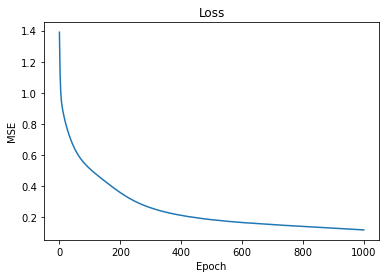

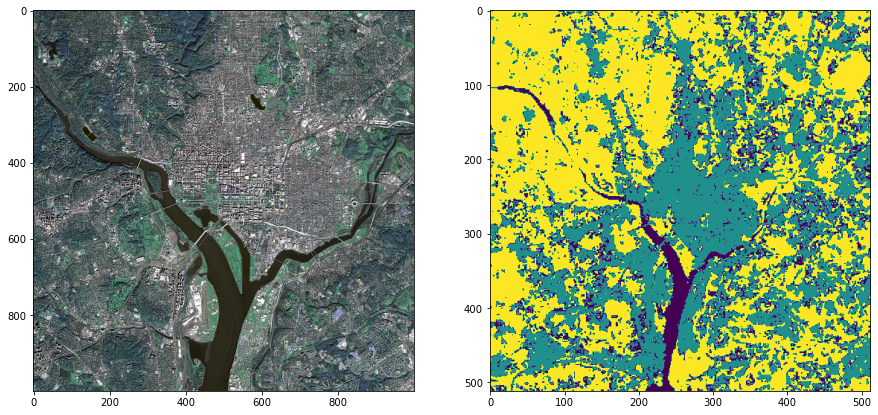

In [86]:
train_test_model(X, Y, (2,), 1000, 0.0001)

## Model 2 (4, 3, 3)

C:\Tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


model [4, (3,), 3]
Accuracy = 0.9818277587569133
Loss = 0.2485309580330665


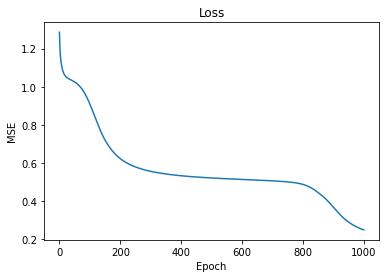

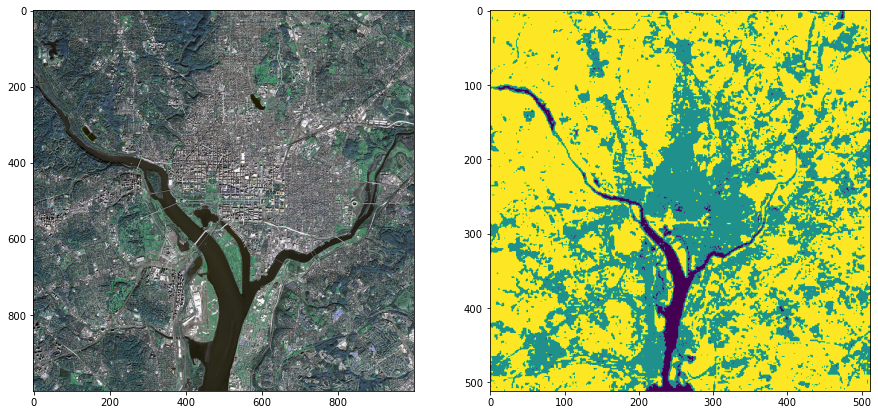

In [87]:
train_test_model(X, Y, (3,), 1000, 0.0001)

## Model 3 (4, 4, 3)

C:\Tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


model [4, (4,), 3]
Accuracy = 0.9928891229918356
Loss = 0.03653512926363803


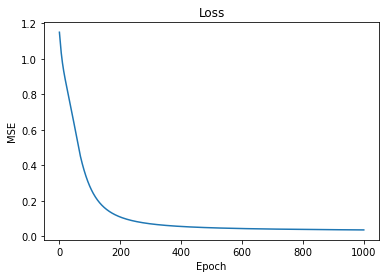

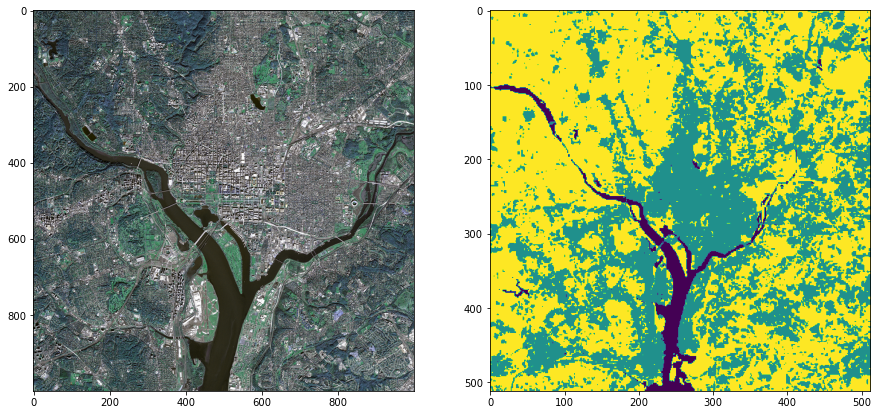

In [88]:
train_test_model(X, Y, (4,), 1000, 0.0001)

## Model 4 (4, 5, 3)

C:\Tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


model [4, (5,), 3]
Accuracy = 0.9931524888069528
Loss = 0.03861202376867917


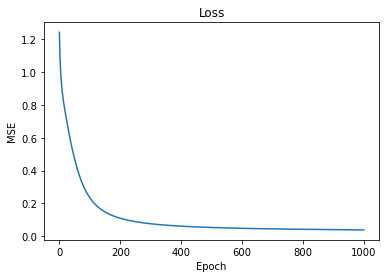

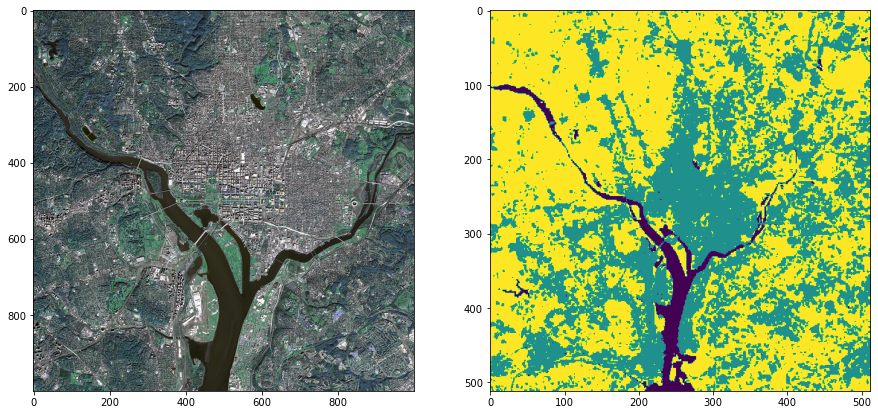

In [89]:
train_test_model(X, Y, (5,), 1000, 0.0001)

## Model 5 (4, 2, 2, 3)

model [4, (2, 2), 3]
Accuracy = 0.9744535159336318
Loss = 0.14074205143848012


C:\Tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


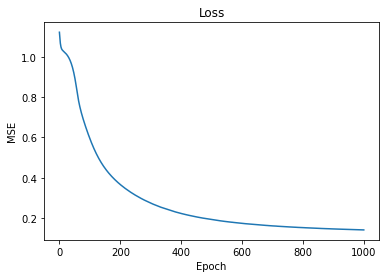

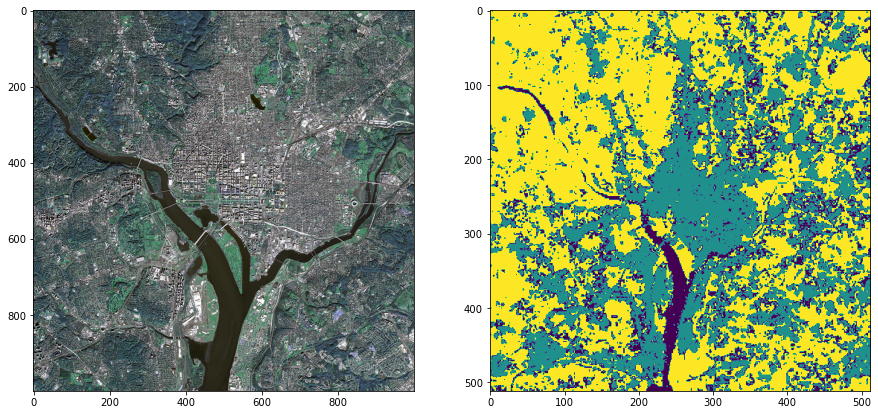

In [90]:
train_test_model(X, Y, (2,2), 1000, 0.0001)

## Model 6 (4, 4, 3, 3)

model [4, (4, 3), 3]
Accuracy = 0.9936792204371873
Loss = 0.03459194940971589


C:\Tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


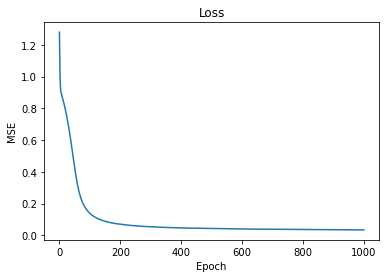

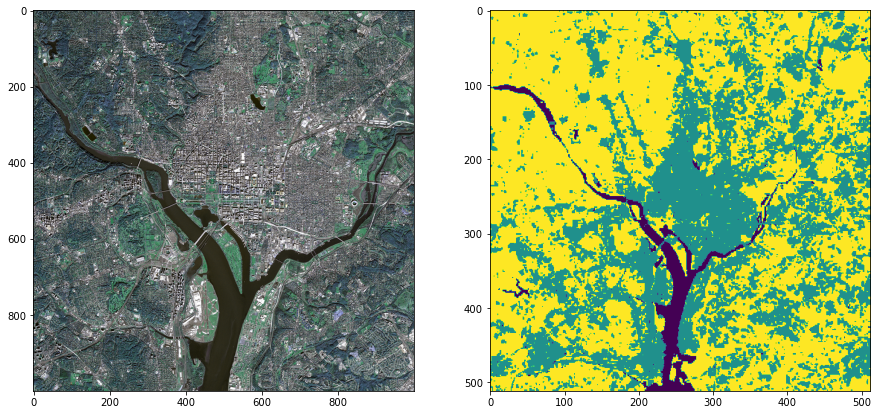

In [91]:
train_test_model(X, Y, (4,3), 1000, 0.0001)

## Model 7 (4, 4, 4, 3)

model [4, (4, 4), 3]
Accuracy = 0.9894653673953121
Loss = 0.04806961220648999


C:\Tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


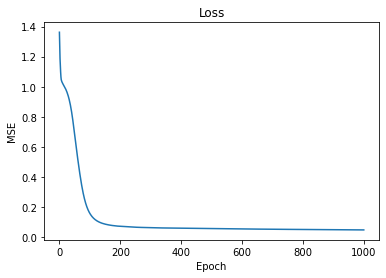

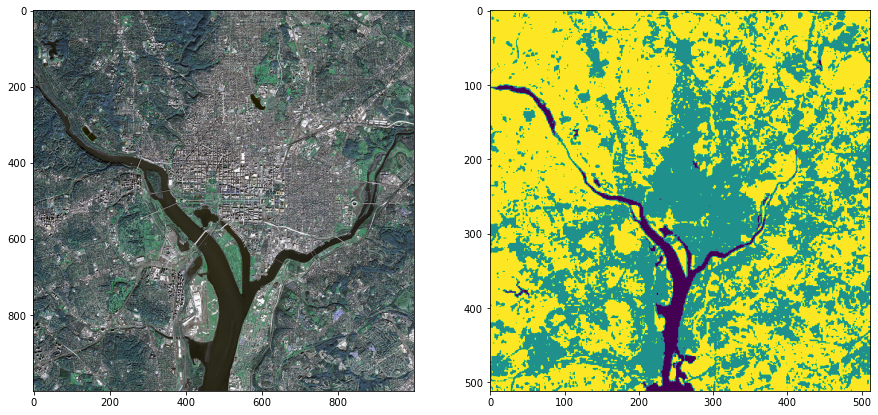

In [97]:
train_test_model(X, Y, (4,4), 1000, 0.0001)

## Model 8 (4, 10, 3, 3)

C:\Tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


model [4, (10, 3), 3]
Accuracy = 0.9807742954964446
Loss = 0.10288961939592181


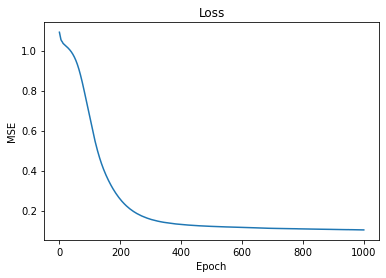

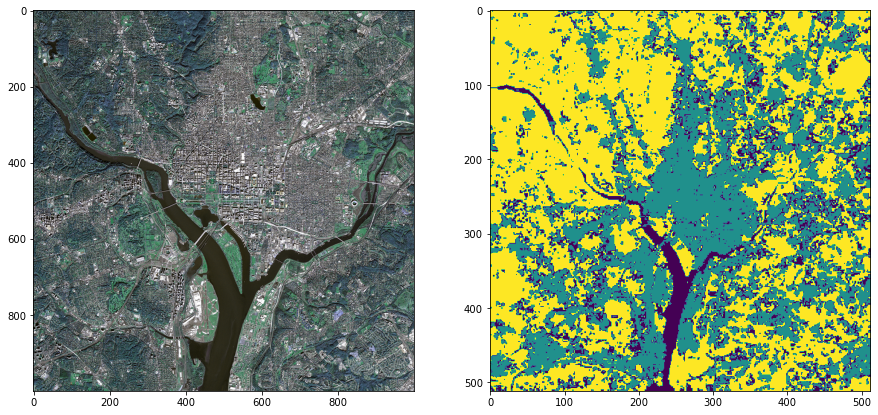

In [94]:
train_test_model(X, Y, (10,3), 1000, 0.0001)

## Model 9 (4, 10, 10, 3)

C:\Tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


model [4, (10, 10), 3]
Accuracy = 0.9936792204371873
Loss = 0.027713560560970865


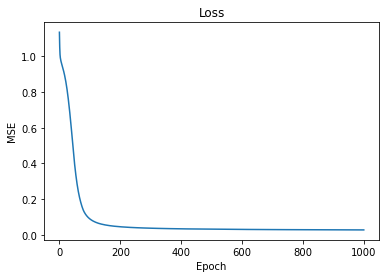

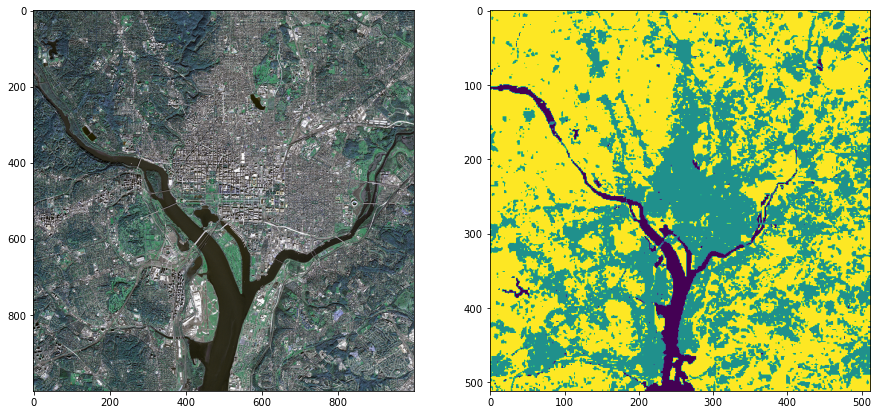

In [95]:
train_test_model(X, Y, (10,10), 1000, 0.0001)

## Model 10 (4, 3, 3) with 10000 epochs

C:\Tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(


model [4, (3,), 3]
Accuracy = 0.9744535159336318
Loss = 0.08643976589710291


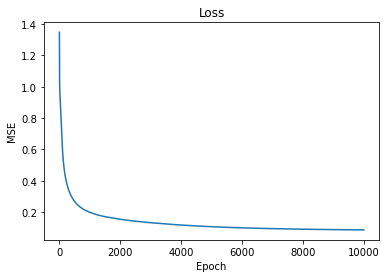

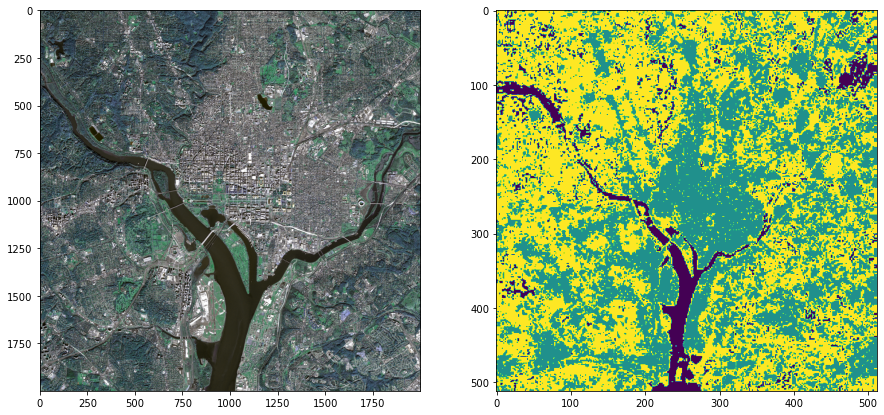

In [52]:
train_test_model(X, Y, (3,), 10000, 0.0001)

## Model 11 (4, 3, 3) with 200 epochs

C:\Tools\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


model [4, (3,), 3]
Accuracy = 0.876218066894917
Loss = 0.4255631626586139


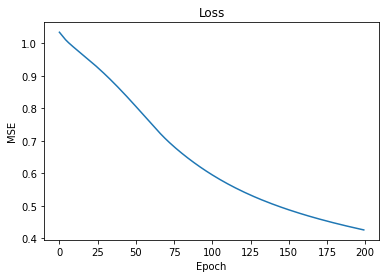

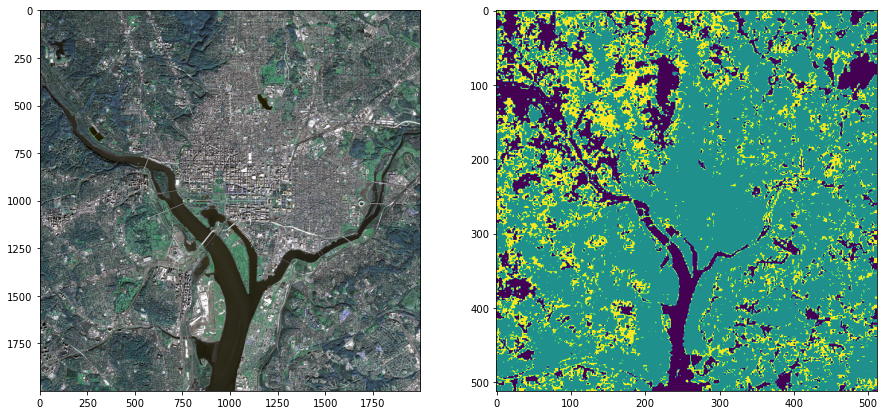

In [59]:
train_test_model(X, Y, (3,), 200, 0.0001)